In [1]:
%pylab inline
from scipy.integrate import odeint
from scipy.integrate import ode

Populating the interactive namespace from numpy and matplotlib


In [2]:
from mpl_toolkits.mplot3d import Axes3D

Condiciones iniciales

In [3]:
a = b = 0.1
c = 14.

In [4]:
def fun_atractor_der(vect, t):
    x = vect[0]
    y = vect[1]
    z = vect[2]
    
    return array([-y-z,
                  x + a*y,
                  b + z*(x - c)])

In [5]:
t0 = 0.
tf = 600.
ts = np.linspace(t0, tf, 10000)

y0 = array([1., 1., 1.])

ys = odeint(fun_atractor_der, y0, ts, printmessg=True)

print ys

Integration successful.
[[  1.           1.           1.        ]
 [  0.89630916   1.06294607   0.4610403 ]
 [  0.81148624   1.12068278   0.21361945]
 ..., 
 [ 10.17764731  -6.60274659   0.01964264]
 [ 10.55522572  -6.01840269   0.02119948]
 [ 10.89687769  -5.4088892    0.02287921]]


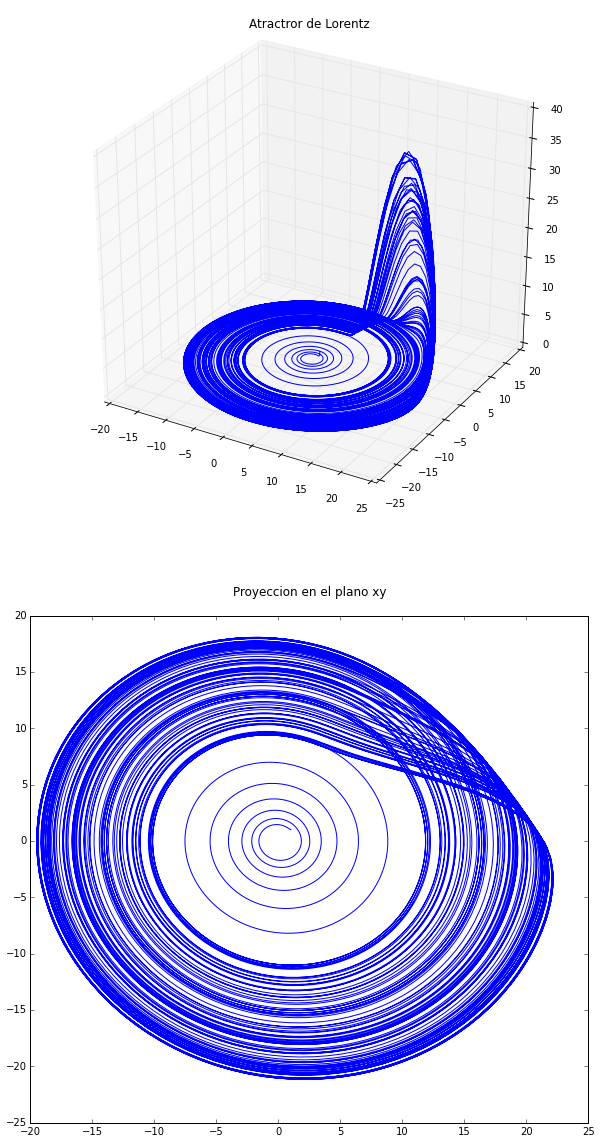

In [6]:
fig_1 = plt.figure("Atractor 1", figsize = (10, 20))

ax_11 = fig_1.add_subplot(211, projection = '3d')
ax_11.plot3D(ys[:, 0], ys[:, 1], ys[:, 2])
ax_11.set_title("Atractror de Lorentz\n")

ax_12 = fig_1.add_subplot(212)
ax_12.plot(ys[:, 0], ys[:, 1])
ax_12.set_title("Proyeccion en el plano xy\n")

plt.show( )

Punto 2

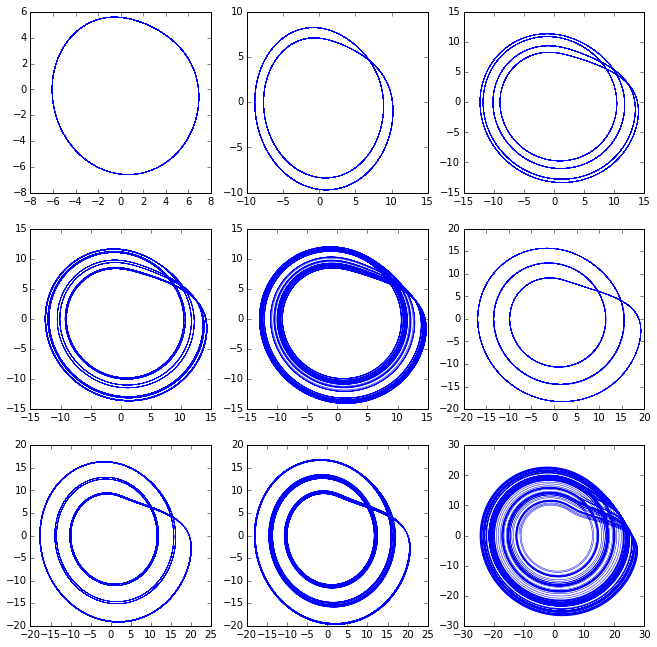

In [7]:
fig_2 = plt.figure("Panel Atractor", figsize = (11, 11))

cs = array([4., 6., 8.5, 8.7, 9., 12., 12.6, 13., 18.])

i = 1
for c in cs:
    exec("ax_2" + str(i) + " = fig_2.add_subplot(3, 3, i)")
    
    exec("ys_" + str(i) + " = odeint(fun_atractor_der, y0, ts)[2000:]")
    
    exec("ax_2" + str(i) + ".plot(ys_" + str(i) + "[:, 0], ys_" + str(i) + "[:, 1], lw = 0.5)")
    
    i+= 1

#Punto 3

In [68]:
numero = 200
a = b = 0.1
cs = np.linspace(1., 45., numero)

t0 = 0.
tf = 600.
ts = np.linspace(t0, tf, 10000)

y0 = array([1., 1., 0.])

In [73]:
def proyeccion_sobre(n_vect, vec):
    unitario = array(n_vect) / np.sum(array(n_vect)**2)**0.5
    coefi = np.dot(unitario, array(vec))
    return array(vec) - coefi * unitario

 ys[i] [-1.12710582  1.14576226  0.00415324]
ys[i] [ 1.36571814 -1.3078777   0.00460901]
ys[i] [ 1.88627775 -1.77239411  0.00471691]
ys[i] [ 4.69312697 -4.67361479  0.00538624]
ys[i] [ -1.02211581e+01   1.02834778e+01   3.03980302e-03]
ys[i] [  1.98700987e+01  -1.97524988e+01   1.70216156e-02]
ys[i] [ -8.96597602e+00   9.05425071e+00   3.15765724e-03]
ys[i] [  1.05061003e+01  -1.03725972e+01   7.53256360e-03]
ys[i] [ -8.74344533e+00   8.75145276e+00   3.17918966e-03]
ys[i] [  1.91234377e+01  -1.90857611e+01   1.56535913e-02]
ys[i] [  1.03144762e+01  -1.01983264e+01   7.43740787e-03]
ys[i] [ -1.62810516e+01   1.63218353e+01   2.57426094e-03]
ys[i] [ 25.2280236  -25.21672583   0.03482024]
ys[i] [ -1.19672838e+01   1.20252150e+01   2.88959415e-03]
ys[i] [ -8.66685484e+00   8.73548170e+00   3.18698058e-03]
ys[i] [ -2.15012423e+01   2.15775238e+01   2.27299212e-03]
ys[i] [  1.02137620e+01  -1.01330727e+01   7.38735033e-03]
ys[i] [ -1.64415537e+01   1.64964535e+01   2.56385565e-03]
ys[i] [ -

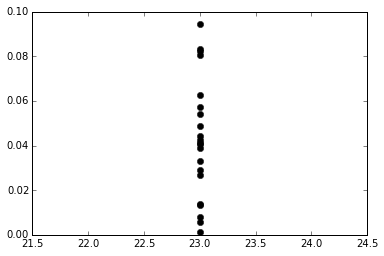

In [72]:
cifras = 3

c = 23.
ys = odeint(fun_atractor_der, y0, ts)
y0_unitario = y0 / np.sum(y0 ** 2)**0.5

proyectados_plano = array([proyeccion_sobre([0., 0., 1.], y) for y in ys])

diferencias = array([
        evaluar - proyeccion_sobre(y0_unitario, evaluar)
        for evaluar in proyectados_plano])

total = 0
valores = array([])

for i in range(len(diferencias)):
    mag_diff = np.sum(diferencias[i] ** 2)**0.5
    valor = np.dot(y0_unitario, proyectados_plano[i])
    
    if mag_diff <= 0.1 and valor > 0:
        print 'ys[i]', ys[i]
        total += 1
        valores = np.append(valores, valor)

print 'total', total
print valores
        
plt.plot(np.ones(len(valores)) * c, valores, 'ko', lw = 0.1)

In [32]:
np.vectorize(proyeccion_sobre)([0., 0., 1.], array([array([1., 1., 1.]), array([2., 2., 3.])]))

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app


array([[ nan,  nan,   0.],
       [ nan,  nan,   0.]])

In [35]:
ys = array([array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.])])
restar = array([1., 1., 1.])
print ys - restar
print np.round(array([1.1, 1.01, 1.001]), 1)

[[ 0. -1. -1.]
 [-1.  0. -1.]
 [-1. -1.  0.]]
[ 1.1  1.   1. ]


AttributeError: 'module' object has no attribute 'magn'

In [6]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y,t0,...)
    
    where y can be a vector.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to 